In [33]:
import pandas as pd
gold_data=pd.read_csv('/content/drive/My Drive/dataset/Goldsorted_final.csv')
gold_data.dropna()
gold_data

,index,Date,Gold 999(AM Price),Gold 999(PM Price),Gold 995(AM Price),Gold 995(PM Price),Gold 916(AM Price),Gold 916(PM Price),Gold 750(AM Price),Gold 750(PM Price),Gold 585(AM Price),Gold 585(PM Price),Silver 999(AM Price),Silver 999(PM Price)
0,1,2019-10-22,38256,38315,38103,38162,35043,35097,28692,28736,22380,22414,45440,45590
1,2,2019-10-23,38398,38431,38244,38278,35173,35203,28799,28823,22463,22482,45500,45535
2,3,2019-10-24,38448,38450,38294,38296,35218,35220,28836,28838,22492,22493,45560,45535
3,4,2019-10-25,38755,38725,38600,38570,35500,35472,29066,29044,22672,22654,46445,46775
4,5,2019-10-29,38316,38321,38163,38168,35097,35102,28737,28741,22415,22418,45840,45840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,229,2020-09-22,50638,50683,50435,50480,46384,46426,37979,38012,29623,29650,59915,59959
229,230,2020-09-23,50222,50327,50021,50125,46003,46100,37667,37745,29380,29441,58217,58908
230,231,2020-09-24,49810,49822,49611,49623,45626,45637,37358,37367,29139,29146,56250,56471
231,232,2020-09-25,50136,49846,49935,49646,45925,45659,37602,37385,29330,29160,58843,57477


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

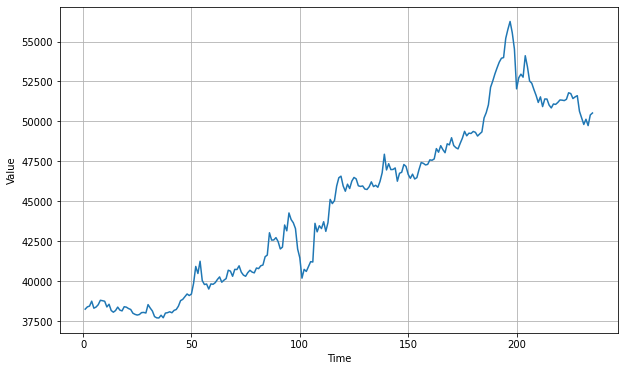

In [ ]:
import csv
time_step = []
sunspots = []

with open('/content/drive/My Drive/dataset/Goldsorted_final.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [ ]:
split_time = 200
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 10
batch_size = 4
shuffle_buffer_size = 77


In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(16, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam())
model1=model.fit(dataset,epochs=1000)


Epoch 1/1000
48/48 [==============================] - 0s 1ms/step - loss: 111044448.0000
Epoch 2/1000
48/48 [==============================] - 0s 1ms/step - loss: 1982438.3750
Epoch 3/1000
48/48 [==============================] - 0s 1ms/step - loss: 1235329.8750
Epoch 4/1000
48/48 [==============================] - 0s 1ms/step - loss: 1273509.3750
Epoch 5/1000
48/48 [==============================] - 0s 1ms/step - loss: 1300478.2500
Epoch 6/1000
48/48 [==============================] - 0s 1ms/step - loss: 1222198.5000
Epoch 7/1000
48/48 [==============================] - 0s 1ms/step - loss: 1151775.0000
Epoch 8/1000
48/48 [==============================] - 0s 1ms/step - loss: 1378600.6250
Epoch 9/1000
48/48 [==============================] - 0s 1ms/step - loss: 1442615.2500
Epoch 10/1000
48/48 [==============================] - 0s 1ms/step - loss: 1555176.8750
Epoch 11/1000
48/48 [==============================] - 0s 1ms/step - loss: 1113654.6250
Epoch 12/1000
48/48 [==================

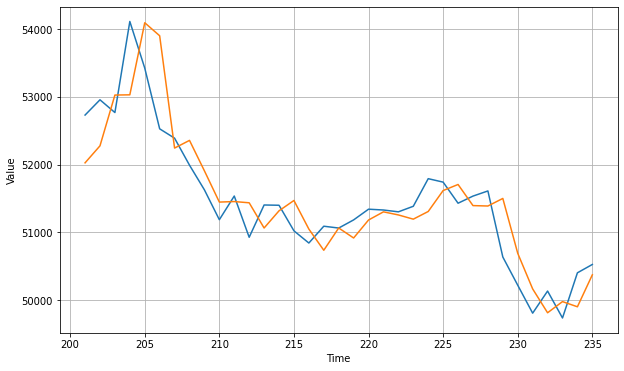

In [ ]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)


In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

362.1749

In [ ]:
time=225
model.predict(series[time:time + window_size][np.newaxis])

array([[51451.973]], dtype=float32)